In [1]:
import pandas as pd
import numpy as np

In [2]:
crime = pd.read_csv('D:\\ExcelR_Classes_Data\\Assignments\\Data_Science\\Assignment - 07 (Clustering)\\crime_data.csv')

In [3]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime2 = crime.rename({"Unnamed: 0":"City"}, axis = 1)

In [5]:
crime2.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
crime2.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
crime2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [8]:
crime2.duplicated().sum()

0

In [9]:
crime3 = crime2.iloc[:, 1:5]

In [10]:
crime3.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [11]:
# standardizing data using MinMaxScaler (user define)

In [12]:
def norm_func(i):
    x = (i - i.min()) / (i.max() - i.min())
    return (x)

In [13]:
norm_crime = norm_func(crime2.iloc[:, 1:])

In [14]:
norm_crime.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


## Dendrogram

In [15]:
import scipy.cluster.hierarchy as sch

In [16]:
import matplotlib.pyplot as plt

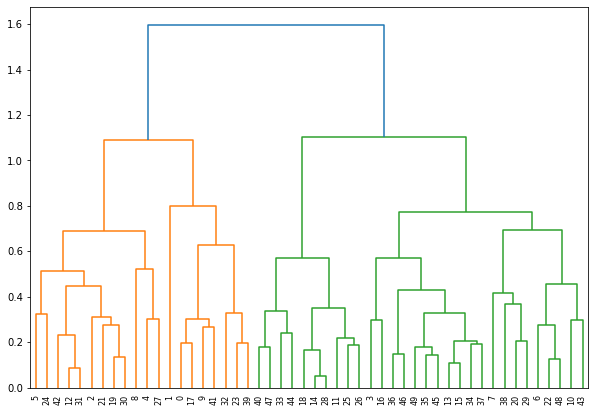

In [17]:
plt.figure(figsize = (10, 7))
dendrogram = sch.dendrogram(sch.linkage(norm_crime, method =  'complete'))

## Hirarchical Clustering (Agglomerative Clustering)

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
norm_crime_clust = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [20]:
norm_crime_clust

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [21]:
y_norm_crime_clust = norm_crime_clust.fit_predict(norm_crime)

In [22]:
y_norm_crime_clust

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [23]:
crime2['H_Clusters'] = y_norm_crime_clust

In [24]:
crime2.head()

,City,Murder,Assault,UrbanPop,Rape,H_Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


## K-Means

In [25]:
from sklearn.cluster import KMeans

In [26]:
# determining how many clusers we need to make using Elbow Curve

empty = []
for i in range (1, 11):
    var = KMeans(n_clusters = i, random_state = 0)
    var.fit(norm_crime)
    empty.append(var.inertia_)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'within cluster sum of sqr distance')

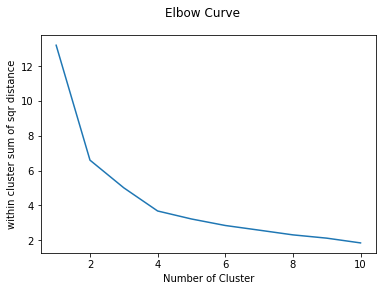

In [27]:
plt.plot(range(1, 11), empty)
plt.suptitle("Elbow Curve")
plt.xlabel("Number of Cluster")
plt.ylabel("within cluster sum of sqr distance")


In [28]:
model_final = KMeans(n_clusters=4)

In [29]:
model_final.fit(norm_crime)

KMeans(n_clusters=4)

In [30]:
model_final.labels_

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 1, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [31]:
## converting array into series

sh = pd.Series(model_final.labels_)

In [32]:
sh.head()

0    0
1    3
2    3
3    0
4    3
dtype: int32

In [33]:
crime2['KMeans_Cluster'] = sh

In [34]:
crime2.head()

,City,Murder,Assault,UrbanPop,Rape,H_Clusters,KMeans_Cluster
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,0,3
2,Arizona,8.1,294,80,31.0,3,3
3,Arkansas,8.8,190,50,19.5,1,0
4,California,9.0,276,91,40.6,3,3


<AxesSubplot:xlabel='KMeans_Cluster'>

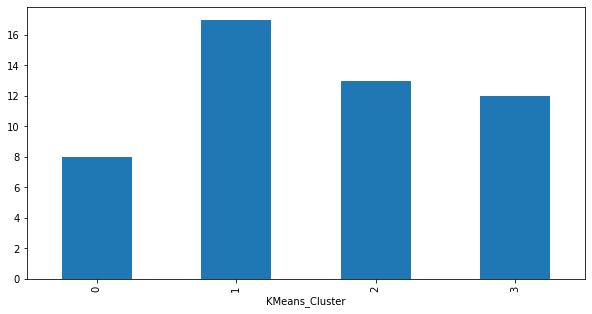

In [41]:
fig, ax = plt.subplots(figsize = (10, 5))
crime2.groupby(['KMeans_Cluster']).count()['City'].plot(kind = 'bar')

## DBSCAN

In [42]:
from sklearn.cluster import DBSCAN

In [58]:
temp = crime2.iloc[:, 1:5]

In [59]:
temp.values

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [60]:
from sklearn.preprocessing import StandardScaler

In [62]:
stdsclr = StandardScaler().fit(temp.values)

In [63]:
arr = stdsclr.transform(temp.values)

In [64]:
arr

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [52]:
dbscan = DBSCAN(eps = 2, min_samples = 5)

In [65]:
dbscan.fit(arr)

DBSCAN(eps=2)

In [66]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [67]:
## No noice in data

In [68]:
cluster = pd.DataFrame(dbscan.labels_, columns=['DBScan_Cluster'])

In [69]:
cluster.head()

,DBScan_Cluster
0,0
1,-1
2,0
3,0
4,0


In [70]:
final = pd.concat([crime2, cluster], axis = 1)

In [71]:
final.head()

,City,Murder,Assault,UrbanPop,Rape,H_Clusters,KMeans_Cluster,DBScan_Cluster
0,Alabama,13.2,236,58,21.2,0,0,0
1,Alaska,10.0,263,48,44.5,0,3,-1
2,Arizona,8.1,294,80,31.0,3,3,0
3,Arkansas,8.8,190,50,19.5,1,0,0
4,California,9.0,276,91,40.6,3,3,0


In [72]:
# onky one record is Noicy

## Silhouette Score (DBScan)

In [74]:
from sklearn.metrics import silhouette_score

In [75]:
accuracy = silhouette_score(arr, dbscan.labels_)

In [76]:
accuracy

0.23455598753159795